## Importando as bibliotecas

- TensorFlow: biblioteca para processamento de dados e contrução de CNN
- Matplot: biblioteca de para geração de imagens gráficas

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Definindo a localização dos dados

Armazena o local onde os dados de treino estão presentes

In [9]:
TRAIN_DIR = "../data/train"

## Carregamento do dataset

- `image_size`: muda as imagens para o tamanho de 224X224 pixels
- `batch_size`: define o número de imagens por lote
- `label_mode`: separa todas as imagens em duas classes
- `shuffle`: define as imagens serão ou não embaralhadas
- `seed`: define como as imagens serão embaralhadas  

In [10]:
train_data = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(224, 224),
    batch_size=32,
    label_mode="binary",
    shuffle=True,
    seed=42,
)

Found 5216 files belonging to 2 classes.


##  Pré processamento das imagens

#### Noramalização

- `normalization_layer`: define para que os pixels da imagem sejam normalizados para valores entre 0 e 1
- Em seguida aplica a normalização nesses parâmetros nas imagens de treino

In [11]:
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)

train_data = train_data.map(lambda x, y: (normalization_layer(x), y))

Separa as imagens e suas classes/rótulos

In [12]:
images, labels = next(iter(train_data))

#### Denfinindo padrões e aplicando aumentação

- `RandomFlip`: inverte a imagem na horizontal aleatoriamente
- `RandomRotation`: gira a imagem aleatoriamente (0.05 equivale a até 5% da circunferência aprox. 18 graus)
- `RandomZoom`: amplia ou reduz na imagem aleatoriamente (0.1 equivale a até 10% do tamanho da imagem)

In [13]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.05),
        tf.keras.layers.RandomZoom(0.1),
    ]
)

augmented_images = data_augmentation(images, training=True)

## Plota um grupo de imagens e seus rótulos

- `plt.figure`: define uma imagem e controla o tamanho que ela vai aparecer na tela
- `plt.subplot`: define que será uma grade com 3X3 sub-imagens e o índice da sub-imagem (que muda a cada interação)
- `plt.imshow`: mostra a sub-imagem
- `plt.tile`: mostra o rótulo da imagem
- `plt.axis`:  deixa a visualização mais limpa (sem régua na imagem)

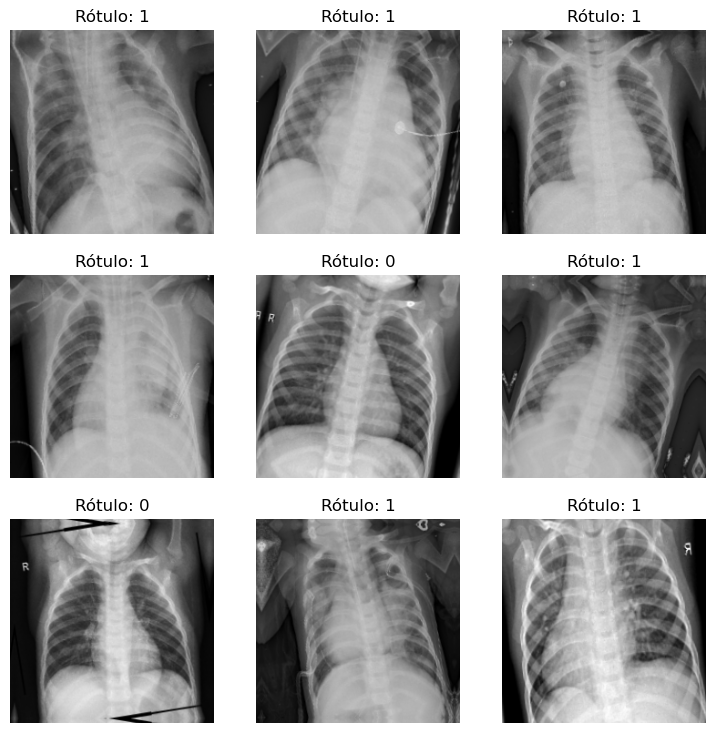

In [14]:
plt.figure(figsize=(9, 9))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(f"Rótulo: {int(labels[i])}")
    plt.axis("off")